### Principal Component Analysis
- Documentation: https://scikit-learn.org/stable/modules/decomposition.html#

In [1]:
from sklearn import datasets, decomposition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# decompose the original feature space into 3 components
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

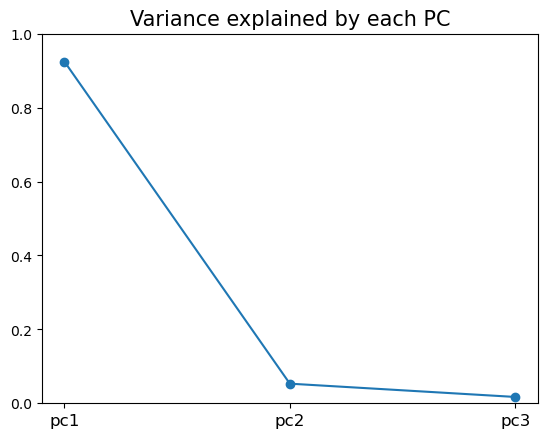

In [7]:
plt.plot(pca.explained_variance_ratio_,'o-')
plt.xticks([0,1,2],['pc1', 'pc2', 'pc3'], fontsize=12)
plt.ylim(0,1)
plt.title('Variance explained by each PC', fontsize=15);

In [8]:
pca.components_ # n_components, n_features
# for each PC, the percentage of each feature contribute to that PC, squared sum equal to 1

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

**Question:** can you manually calculate how to transform each data in the original 4-d space to the 3-d PCA space?

In [9]:
X.values[0]

array([5.1, 3.5, 1.4, 0.2])

In [10]:
X_pca[0]

array([-2.68412563,  0.31939725, -0.02791483])

In [11]:
# np.dot(X.values[0], pca.components_[0])

2.8182395066394688

In [ ]:
# scaler = tandardscaler(with_std=False)
#X_scalue= scaler.fit_transofmr(X)

### Visualize the data with the first PC

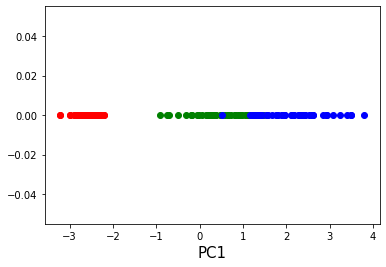

In [71]:
plt.plot(X_pca[:,0][np.where(y==0)], np.zeros(len(np.where(y==0)[0])), 'o',color='red')
plt.plot(X_pca[:,0][np.where(y==1)], np.zeros(len(np.where(y==1)[0])), 'o',color='green')
plt.plot(X_pca[:,0][np.where(y==2)], np.zeros(len(np.where(y==2)[0])), 'o',color='blue')
plt.xlabel('PC1', fontsize=15);

### Visualize the data with the top-2 PCs

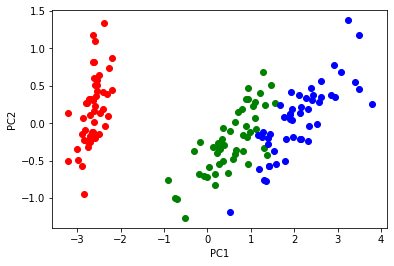

In [72]:
plt.plot(X_pca[:,0][np.where(y==0)], X_pca[:,1][np.where(y==0)], 'o', color='red')
plt.plot(X_pca[:,0][np.where(y==1)], X_pca[:,1][np.where(y==1)], 'o', color='green')
plt.plot(X_pca[:,0][np.where(y==2)], X_pca[:,1][np.where(y==2)], 'o', color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2');

### Visualize the data with 3 PCs

In [ ]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
np.random.seed(5)

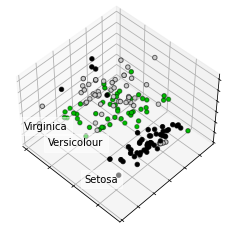

In [74]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()

# visualize the name of the category
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X_pca[y == label, 0].mean(),
        X_pca[y == label, 1].mean() + 1.5,
        X_pca[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )

# # Reorder the labels to have colors matching the cluster results
y_color = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_color, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()